In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/NY_italian_restaurants (1).csv')
df

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0
2,3,Biricchino,34,21,13,18,0
3,4,Bottino,41,20,20,17,0
4,5,Da Umberto,54,24,19,21,0
...,...,...,...,...,...,...,...
163,164,Baci,31,17,15,16,0
164,165,Puccini,26,20,16,17,0
165,166,Bella Luna,31,18,16,17,0
166,167,MÃ©tisse,38,22,17,21,0


In [4]:
df.describe()

,Case,Price,Food,Decor,Service,East
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000
mean,84.500000,42.696429,20.595238,17.690476,19.39881,0.630952
std,48.641546,9.292814,1.982674,2.702743,2.11394,0.483989
min,1.000000,19.000000,16.000000,6.000000,14.00000,0.000000
25%,42.750000,36.000000,19.000000,16.000000,18.00000,0.000000
50%,84.500000,43.000000,20.500000,18.000000,20.00000,1.000000
75%,126.250000,50.000000,22.000000,19.000000,21.00000,1.000000
max,168.000000,65.000000,25.000000,25.000000,24.00000,1.000000


In [5]:
df.shape

(168, 7)

In [6]:
df.isnull().sum()

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [8]:
df.keys()

Index(['Case', 'Restaurant', 'Price', 'Food', 'Decor', 'Service', 'East'], dtype='object')

In [9]:
df2  = df[['Price', 'Food', 'Decor', 'Service']].copy()
df2

,Price,Food,Decor,Service
0,43,22,18,20
1,32,20,19,19
2,34,21,13,18
3,41,20,20,17
4,54,24,19,21
...,...,...,...,...
163,31,17,15,16
164,26,20,16,17
165,31,18,16,17
166,38,22,17,21


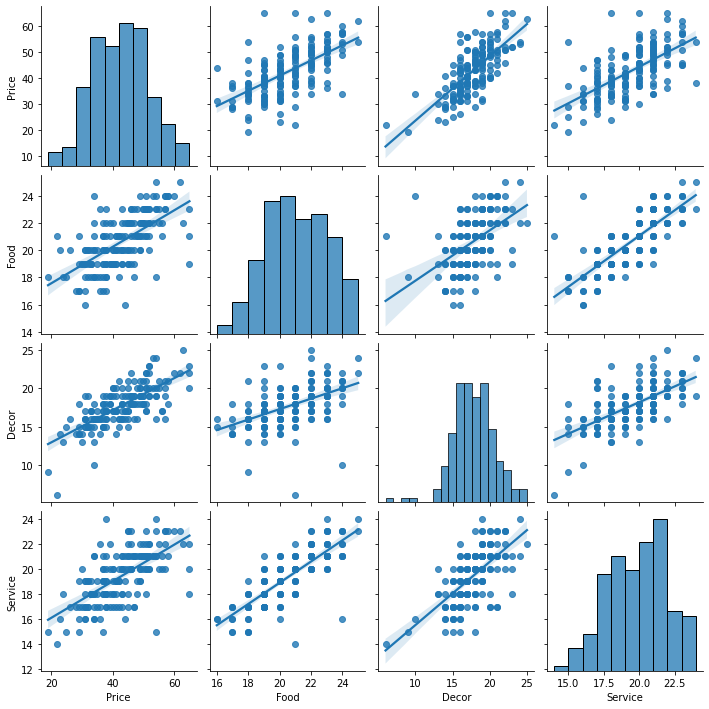

In [10]:
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
sns.pairplot(df2, kind ='reg')

In [12]:
y = df2['Price']
X = df2[['Food', 'Decor', 'Service']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134, 3) (34, 3) (134,) (34,)


In [15]:
X_train

,Food,Decor,Service
61,19,16,17
44,22,17,21
24,22,20,22
63,20,19,19
89,21,15,18
...,...,...,...
9,21,17,19
103,18,15,17
67,17,14,15
117,19,17,19


In [16]:
X_test

,Food,Decor,Service
151,23,19,23
56,23,17,20
123,20,23,20
60,24,20,21
100,19,18,21
51,20,20,20
7,20,18,21
5,22,22,21
86,23,18,20
135,19,19,18


In [18]:
lineal = LinearRegression()
lasso = Lasso(alpha = 1)
ridge = Ridge(alpha = 1)
elastic = ElasticNet(alpha = 1, l1_ratio = 0.1)

In [19]:
lineal.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1, l1_ratio=0.1)

In [24]:
print("coef Lineal ",lineal.coef_.tolist())
print("coef lasso ", lasso.coef_.tolist())
print("coef ridge ", ridge.coef_.tolist())
print("coef elastic ", elastic.coef_.tolist())


coef Lineal  [1.268297790508605, 1.8844780325113775, 0.5122271339146043]
coef lasso  [1.09895105333065, 1.8547875665110036, 0.4422349497238768]
coef ridge  [1.263776498325395, 1.8818836728670552, 0.5170556925414382]
coef elastic  [0.983795506084289, 1.6641841357307272, 0.7483265518006114]


In [29]:
# se realiza la predicción con los 4 sistemas lineas train
y_pred_train_lineal = lineal.predict(X_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_train_elastic = elastic.predict(X_train)
print("prediction lineal",y_pred_train_lineal[:7] )
print("prediction lasso",y_pred_train_lasso[:7])
print("prediction ridge",y_pred_train_ridge[:7])
print("prediction elastic",y_pred_train_elastic[:7])

prediction lineal [36.30106958 44.03934952 50.20501075 44.24725573 37.46541426 50.20501075
 45.72345974]
prediction lasso [36.78941024 43.70999076 49.71658841 44.33719389 37.57475973 49.71658841
 46.06334807]
prediction ridge [36.30129507 44.04273101 50.20543772 44.24483397 37.46402009 50.20543772
 45.71071344]
prediction elastic [36.56729533 44.17617219 49.91705115 44.04029635 37.61902876 49.91705115
 44.88821601]


In [31]:
# se realiza la predicción con los 4 sistemas lineas test
y_pred_test_lineal = lineal.predict(X_test)
y_pred_test_lasso = lasso.predict(X_test)
y_pred_test_ridge = ridge.predict(X_test)
y_pred_test_elastic = elastic.predict(X_test)
print("prediction lineal",y_pred_test_lineal[:7] )
print("prediction lasso",y_pred_test_lasso[:7])
print("prediction ridge",y_pred_test_ridge[:7])
print("prediction elastic",y_pred_test_elastic[:7])

prediction lineal [50.10105764 44.79542017 52.297395   52.2293792  42.11893418 46.6439609
 43.38723197]
prediction lasso [49.40298685 44.36670687 52.1985791  51.47225557 42.26792517 46.63421641
 43.36687622]
prediction ridge [50.10438624 44.78945181 52.28942436 52.21593502 42.13328519 46.64377334
 43.39706169]
prediction elastic [49.98498907 44.41164115 51.44535944 51.13631561 42.88896981 46.45280703
 43.87276532]


In [33]:
# obtenemos el error cuadratico medio
error_lineal_sq = metrics.mean_squared_error(y_train,y_pred_train_lineal)
error_lasso_sq = metrics.mean_squared_error(y_train,y_pred_train_lasso)
error_ridge_sq = metrics.mean_squared_error(y_train,y_pred_train_ridge)
error_elastic_sq = metrics.mean_squared_error(y_train,y_pred_train_elastic)
print("error cuadratico de lineal ",error_lineal_sq)
print("error cuadratico de lasso ",error_lasso_sq)
print("error cuadratico de ridge ",error_ridge_sq)
print("error cuadratico de elastic ",error_elastic_sq)

error cuadratico de lineal  32.73360017596516
error cuadratico de lasso  33.002562741154506
error cuadratico de ridge  32.73366062038406
error cuadratico de elastic  33.183316621525634


In [ ]:
metrics.mean_squared_error(y_test,y_pred_test_lineal)

34.90467923649517

In [ ]:
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

4.5143548493673356

In [34]:
y_error_train_lineal = y_train - y_pred_train_lineal
y_error_train_lasso = y_train - y_pred_train_lasso
y_error_train_ridge = y_train - y_pred_train_ridge
y_error_train_elastic = y_train - y_pred_train_elastic

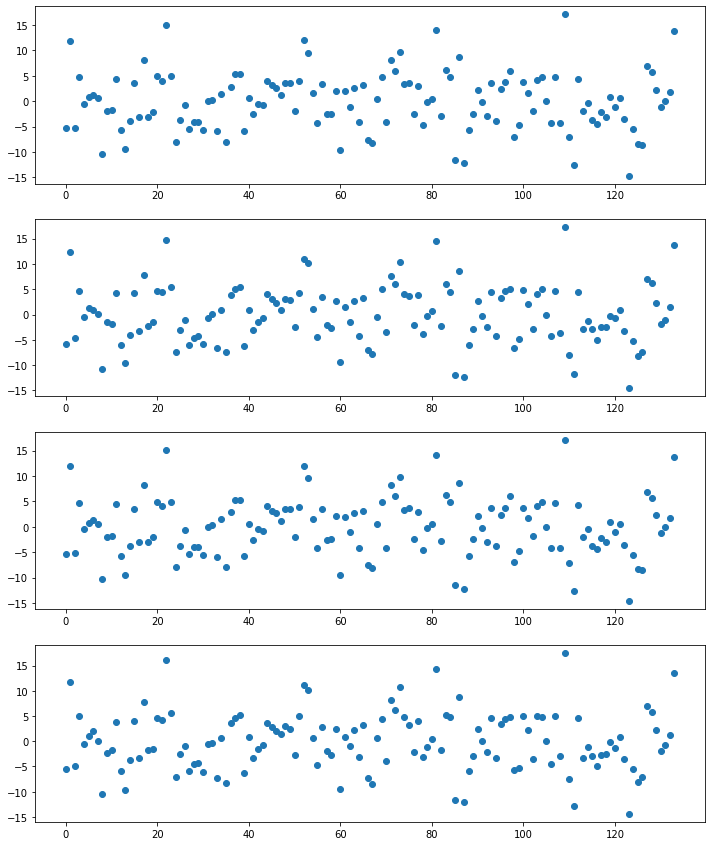

In [45]:
fig, axs = plt.subplots(4,figsize=(12,15))
axs[0].scatter(x = range(len(y_error_train_lineal)), y=y_error_train_lineal)
axs[1].scatter(x = range(len(y_error_train_lasso)), y=y_error_train_lasso)
axs[2].scatter(x = range(len(y_error_train_ridge)), y=y_error_train_ridge)
axs[3].scatter(x = range(len(y_error_train_elastic)), y=y_error_train_elastic)


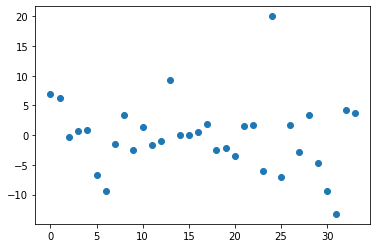

In [ ]:
y_error_test = y_test - y_pred_test_lineal
plt.scatter(x = range(len(y_error_test)), y=y_error_test)